In [24]:
import pandas as pd
import matplotlib.pyplot as plt

import pywt

import numpy as np

import json

In [6]:
df = pd.read_csv("DataHvALabel.csv", low_memory=False, parse_dates=True)
df.head()


,series,timestamp,value,label
0,Heetgas leiding,2021-08-17T13:27:14.000Z,25.6,NaN
1,Vloeistof leiding,2021-08-17T13:27:14.000Z,24.6,NaN
2,Zuigleiding,2021-08-17T13:27:14.000Z,26.5,NaN
3,Omgeving,2021-08-17T13:27:14.000Z,25.4,NaN
4,Gekoelde ruimte (2),2021-08-17T13:27:14.000Z,8.6,NaN


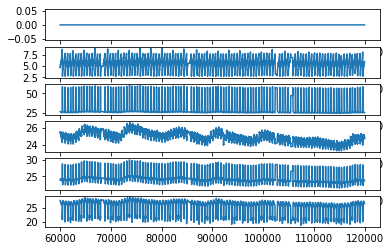

In [8]:

grouped_data = {series: data for series, data in  df.groupby(by="series")}
fig, axs = plt.subplots(len(grouped_data))
for ax, (series, data) in zip(axs, grouped_data.items()):
    #data.set_index("timestamp", inplace=True)
    ax.plot(data.loc[:, "value"][10_000:20_000])

In [9]:
list(grouped_data.keys())[3]

'Omgeving'

In [10]:
omg = grouped_data.get("Omgeving").loc[:, "value"].to_numpy()
widths = np.arange(100, 3100, 100)

In [12]:
cwtmatr = pywt.cwt(omg,widths, "mexh")

In [18]:
coef, _= cwtmatr

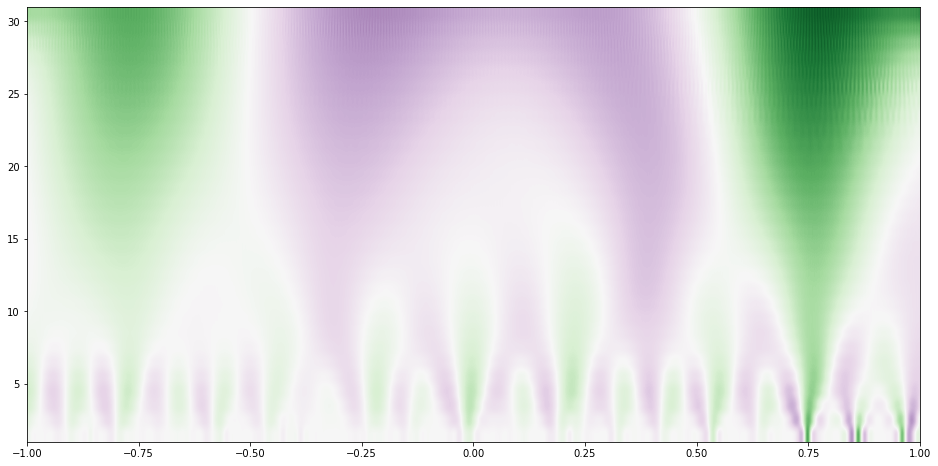

In [44]:
fig, ax = plt.subplots(figsize=(16, 8))
y_flip = np.flipud(coef[:, 9_500: -9_500])
ax.imshow(y_flip, extent=[-1, 1, 1, 31], cmap="PRGn", aspect="auto", vmax=abs(y_flip).max(), vmin=-abs(y_flip).max())
fig.savefig("cwt.png", dpi=300)

In [26]:
with open("cwt.json", 'w') as f:
    json.dump(coef[:, 9_500:-9500].tolist(), f)

In [30]:
y_flip.shape

(30, 26440)

In [33]:
X, Y = np.meshgrid(np.arange(30), np.arange(26440))

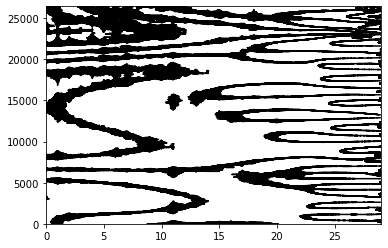

In [43]:
fig, ax = plt.subplots()
ax.contour(X, Y, y_flip.transpose(), levels=5, colors="black")